In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame([[8,8,4] , [7,9,5] , [6,10,6] , [5,12,7]] , columns = ['cgpa' , 'profile_score' , 'lpa'])

In [ ]:
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [ ]:
def initialize_parameters(layer_dims):

  np.random.seed(3)
  parameters ={}
  L =len(layer_dims)

  for l in range(1,L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1] , layer_dims[l]))*0.1
    parameters['b' +str(l)] =np.zeros((layer_dims[l] , 1))

  return parameters

In [ ]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [ ]:
X = df[['cgpa' , 'profile_score']].values[3].reshape(2,1)         # shape(no. of features , no. of training example)
y = df[['lpa']].values[3][0]


In [ ]:
def linear_forward(A_prev , W , b):

  Z = np.dot(W.T , A_prev) +b

  return Z

In [ ]:
# Forward Propagation

def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2      # no.of layers in the neural network

  for l in range(1 , L+1):
    A_prev = A
    W1 = parameters['W' + str(l)]
    b1 = parameters['b' + str(l)]
    #print("A"+str(l-1)+":",A_prev)
    #print("W"+str(l)+":",W1)
    #print("b"+str(l)+":",b1)
    #print("--" * 20)

    A  = linear_forward(A_prev , W1 , b1)
    #print("A"+str(l)+":",A)
    #print("**" * 20)

  return A , A_prev

In [ ]:
X

array([[ 5],
       [12]])

In [ ]:
y

7

In [ ]:
y_hat , A1 = L_layer_forward(X , parameters)

A0: [[ 5]
 [12]]
W1: [[0.12459806 0.12459806]
 [0.13347329 0.13347329]]
b1: [[0.00362946]
 [0.00362946]]
----------------------------------------
A1: [[2.22829927]
 [2.22829927]]
****************************************
A1: [[2.22829927]
 [2.22829927]]
W2: [[0.14802989]
 [0.14802989]]
b2: [[0.02759933]]
----------------------------------------
A2: [[0.68730913]]
****************************************


In [ ]:
(y - y_hat)**2

array([[39.85006598]])

In [ ]:
A1

array([[2.22829927],
       [2.22829927]])

In [ ]:
y_hat = y_hat[0][0]

In [ ]:
def update_parameters(parameters , y , y_hat , A1, X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y-y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y-y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['b2'][0][0] + (0.001 * 2 * (y-y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y-y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y-y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y-y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y-y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y-y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y-y_hat)*parameters['W2'][1][0])

In [ ]:
update_parameters(parameters , y ,y_hat , A1 , X)

In [ ]:
parameters

{'W1': array([[0.13571869, 0.13571869],
        [0.1601628 , 0.1601628 ]]),
 'b1': array([[0.00585359],
        [0.00585359]]),
 'W2': array([[0.17616302],
        [0.17616302]]),
 'b2': array([[0.04022471]])}

In [ ]:
df.shape

(4, 3)

**epoch implementation**

In [ ]:
# epoch implementation

parameters = initialize_parameters([2,2,1])
epochs = 75
epoch_loss = []

for i in range(epochs):
  Loss = []

  for j in range(df.shape[0]):
    X = df[['cgpa' , 'profile_score']].values[j].reshape(2,1)
    y = df[['lpa']].values[j][0]

    y_hat , A1 = L_layer_forward(X , parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters , y , y_hat , A1 , X)

    Loss.append((y-y_hat)**2)

  epoch_loss.append(np.array(Loss).mean())
  print('Epoch - ',i+1,'Loss - ', epoch_loss[-1])

parameters

Epoch -  1 Loss -  26.249691774703265
Epoch -  2 Loss -  19.19634375189233
Epoch -  3 Loss -  9.702531836210806
Epoch -  4 Loss -  3.0274162602080916
Epoch -  5 Loss -  1.0597082587765176
Epoch -  6 Loss -  0.8771341125393668
Epoch -  7 Loss -  0.9043847287039875
Epoch -  8 Loss -  0.9098910885136656
Epoch -  9 Loss -  0.8984198234465794
Epoch -  10 Loss -  0.8811710500481387
Epoch -  11 Loss -  0.8624558353005285
Epoch -  12 Loss -  0.843633387420633
Epoch -  13 Loss -  0.8251023933883717
Epoch -  14 Loss -  0.8069696299763118
Epoch -  15 Loss -  0.7892553732258184
Epoch -  16 Loss -  0.7719548957951685
Epoch -  17 Loss -  0.7550566989371805
Epoch -  18 Loss -  0.7385478707457893
Epoch -  19 Loss -  0.7224156296949529
Epoch -  20 Loss -  0.7066477418855522
Epoch -  21 Loss -  0.6912326082242793
Epoch -  22 Loss -  0.6761592569226377
Epoch -  23 Loss -  0.6614173106705683
Epoch -  24 Loss -  0.6469969487407259
Epoch -  25 Loss -  0.6328888697866473
Epoch -  26 Loss -  0.619084256837960

{'W1': array([[0.03130949, 0.03130949],
        [0.55225973, 0.55225973]]),
 'b1': array([[0.02079457],
        [0.02079457]]),
 'W2': array([[0.49460747],
        [0.49460747]]),
 'b2': array([[0.09496894]])}

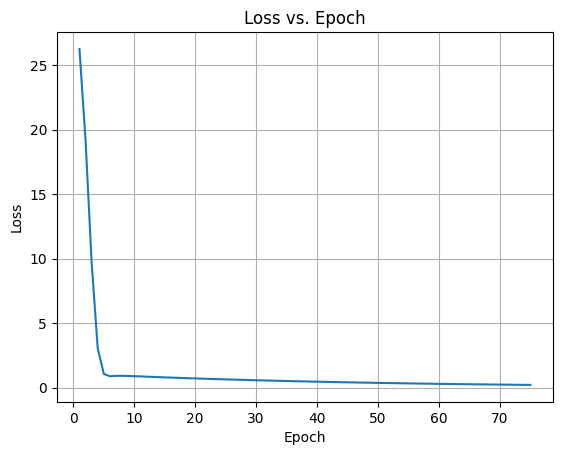

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, epochs + 1), epoch_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.grid(True)
plt.show()